# Stoneburner, Kurt
- ## DSC 640 - Week 05/06: Tree, Area & Stacked Charts

1 tree map, 1 area chart and 1 stacked area chart using Python

Squarify Reference for Text Area Plots: https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib

### Matplotlib ###
- Stackplot: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html
- Color Bar Placement: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
- ColorMaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
- Reverse Legend Order: https://codeyarns.com/tech/2019-09-12-how-to-reverse-order-of-legend-in-matplotlib.html

Convert A Colormap into categorical Colors

In [1]:
#col = 'expenditure'
#vmin=min(plot_df[col])
#vmax=max(plot_df[col])
#norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
#colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify 
#conda install -c conda-forge squarify

from PIL import Image

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

out_file_for_print = []

In [3]:
#z_wk05_06_expenditures.txt
#z_wk05_06_unemployement-rate-1948-2010.csv

ex_df = pd.read_csv("z_wk05_06_expenditures.txt",sep="\t")

#//*** Setup a type dictionary to associate columns with a particular type.
type_dict = {
    'year' : int,
    'category' : str,
    'expenditure' : int,
    'sex' : int,
}

#//*** Assign column types
for col,col_type in type_dict.items():
    ex_df[col] = ex_df[col].astype(col_type)

del ex_df['sex']

ex_df['category'] = ex_df['category'].str.replace('Miscellaneous',"Misc")
ex_df['category'] = ex_df['category'].str.replace('Cash Contributions',"Cash")
ex_df['category'] = ex_df['category'].str.replace('Tobacco Products',"Tobacco")
ex_df['category'] = ex_df['category'].str.replace('Alcoholic Beverages',"Alcohol")

ex_df


,year,category,expenditure
0,2008,Food,6443
1,2008,Alcohol,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604
...,...,...,...
345,1984,Education,303
346,1984,Tobacco,228
347,1984,Misc,451
348,1984,Cash,706


In [4]:
out_df = pd.DataFrame()
for group in ex_df.groupby('year'):
    loop_df = group[1].copy()
    loop_df['percent'] = loop_df['expenditure'] / loop_df['expenditure'].sum()
    out_df = pd.concat([out_df,loop_df])
ex_df = out_df.copy()
del out_df

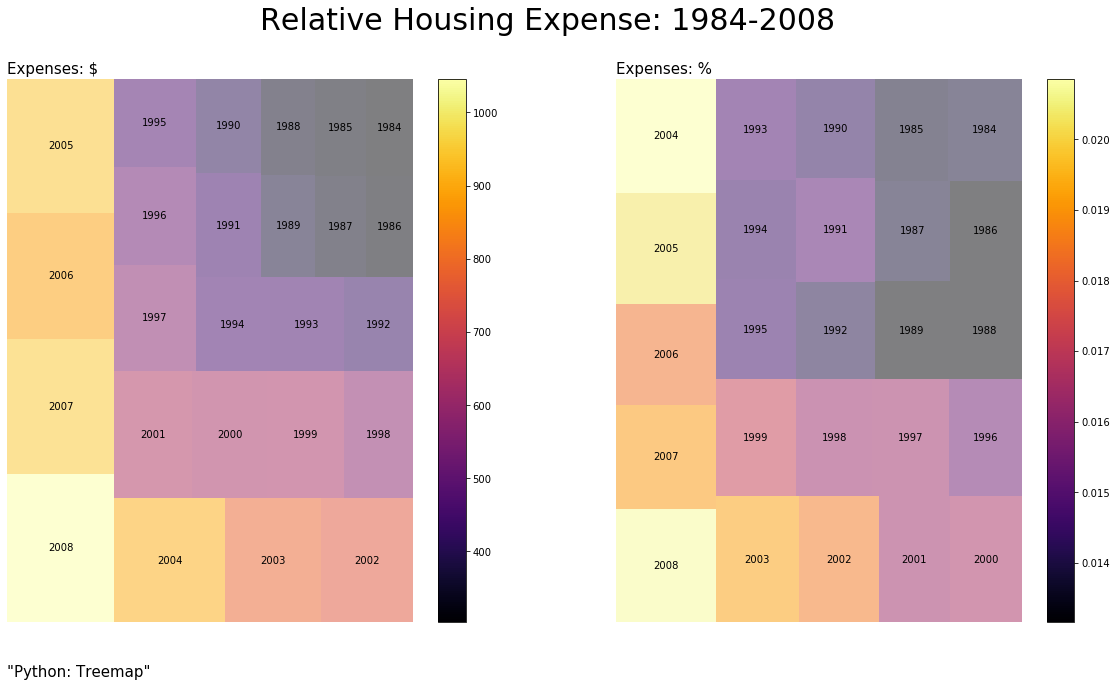

In [5]:
import matplotlib
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col1' : 'expenditure',
    'x_col2' : 'percent',
    'label_col' : 'category',
    'fontsize_title' : 15,
    'fontsize' : 15,
    #'label_col' : 'expenditure',
}

fig, ax = plt.subplots(ncols=2)
fig = plt.gcf()
fig.set_size_inches(20,10)

plot_df = ex_df[ex_df['year']==2008]
plot_df = ex_df[ex_df['category']=='Education'].sort_values('year',ascending=False)

col = 'expenditure'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[0])

ax1 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[0])
ax1.yaxis.label.set_size(106)


col = 'percent'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[1])
ax2 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[1])

ax1.axis('off')
ax2.axis('off')

plt.text(pp['x_figsize']*-7.5,pp['y_figsize']*10.1,"Expenses: $ ",fontsize=15)
plt.text(pp['x_figsize']*0,pp['y_figsize']*10.1,"Expenses: % ",fontsize=15)
plt.suptitle(f"Relative Housing Expense: 1984-2008",fontsize=30)
plt.text(0,-.1,'"Python: Treemap"', size=pp['fontsize'], transform=ax[0].transAxes)
outfilename = 'output_wk05_06_python_treemap_housing.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)
plt.show()
#plt.magma()
#plot_df

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_1.jpg


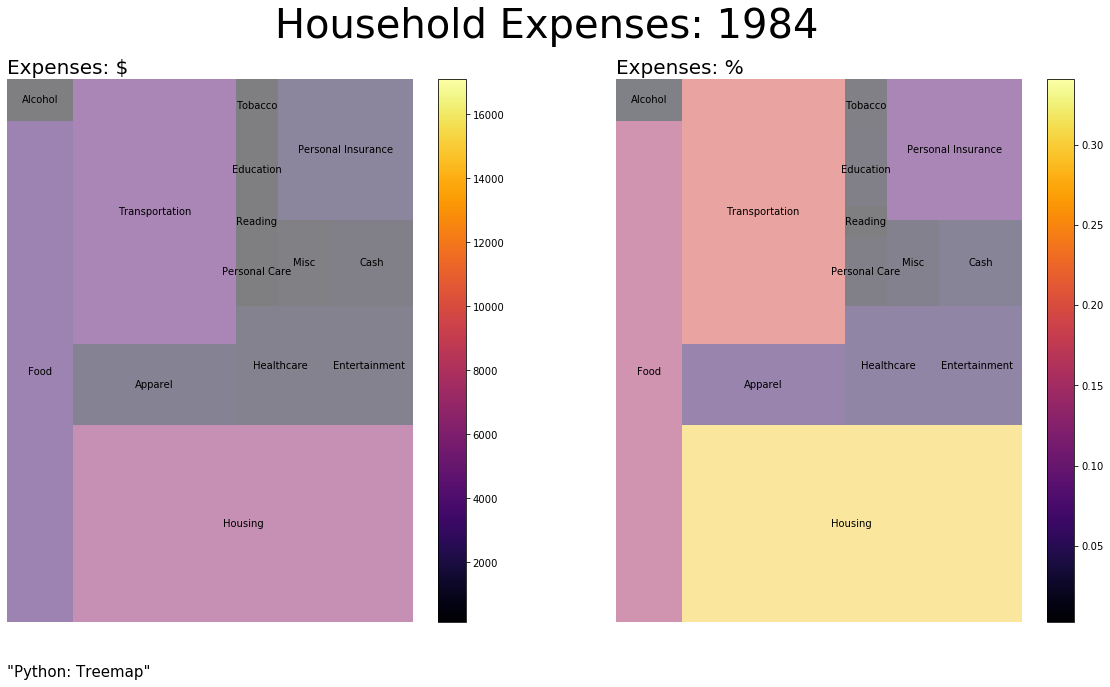

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_2.jpg


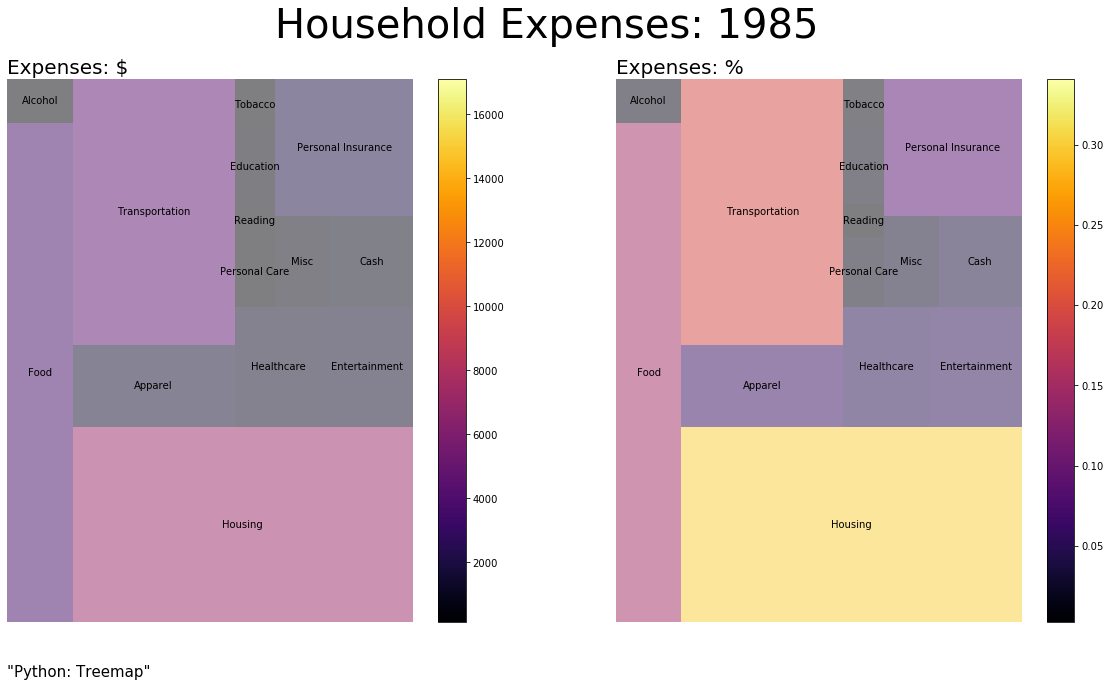

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_3.jpg


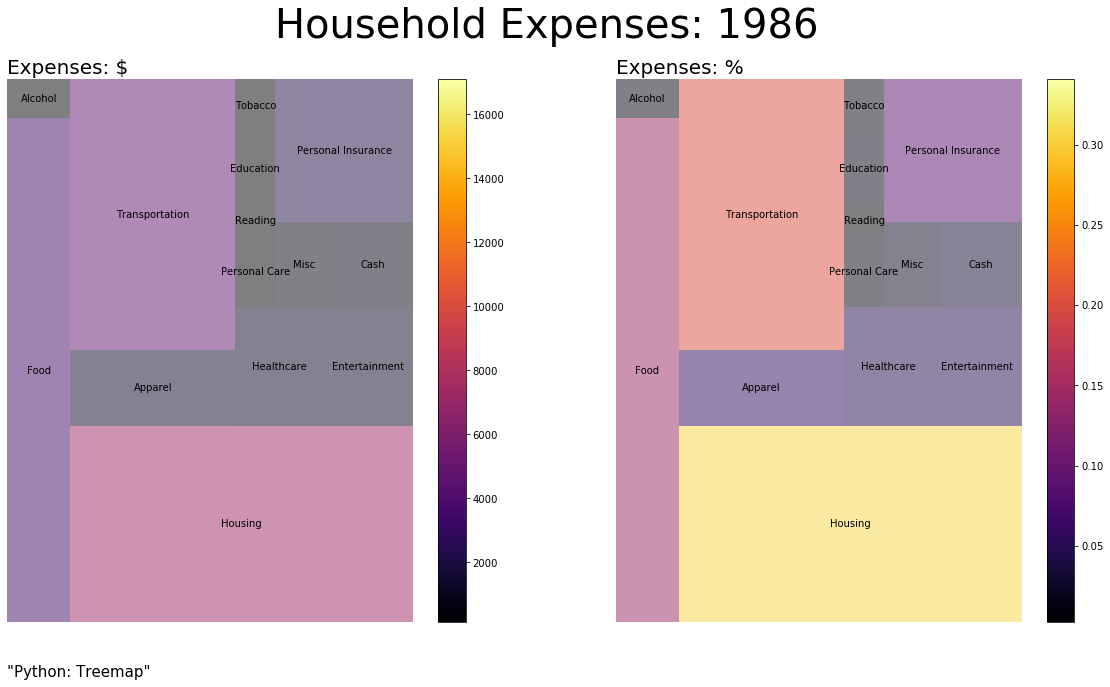

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_4.jpg


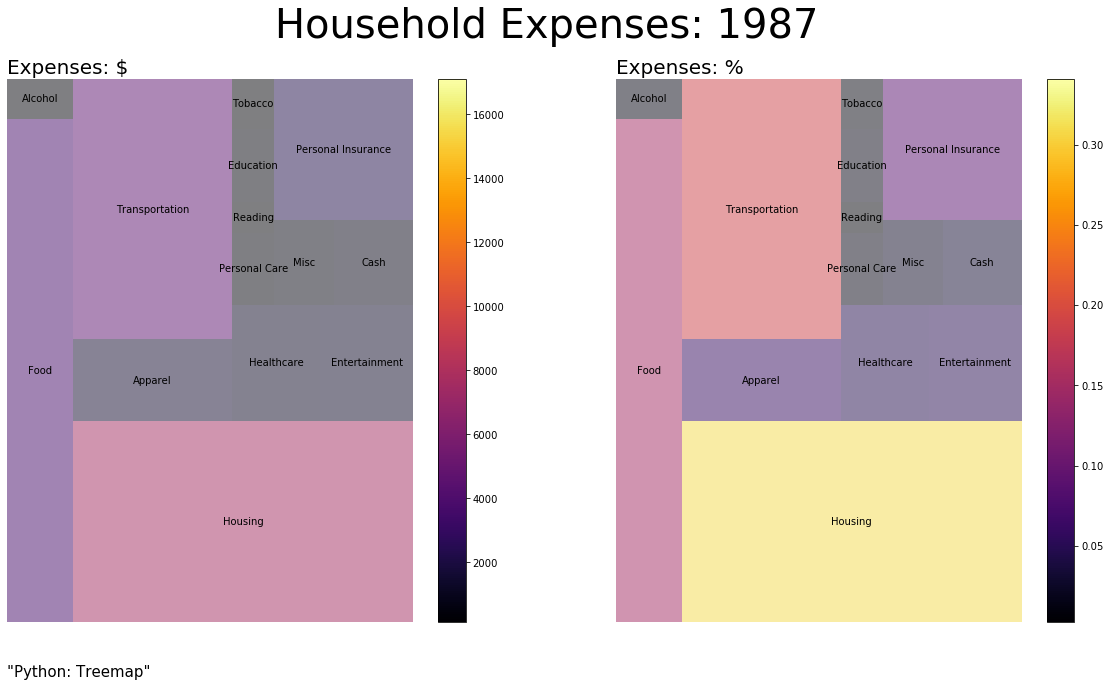

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_5.jpg


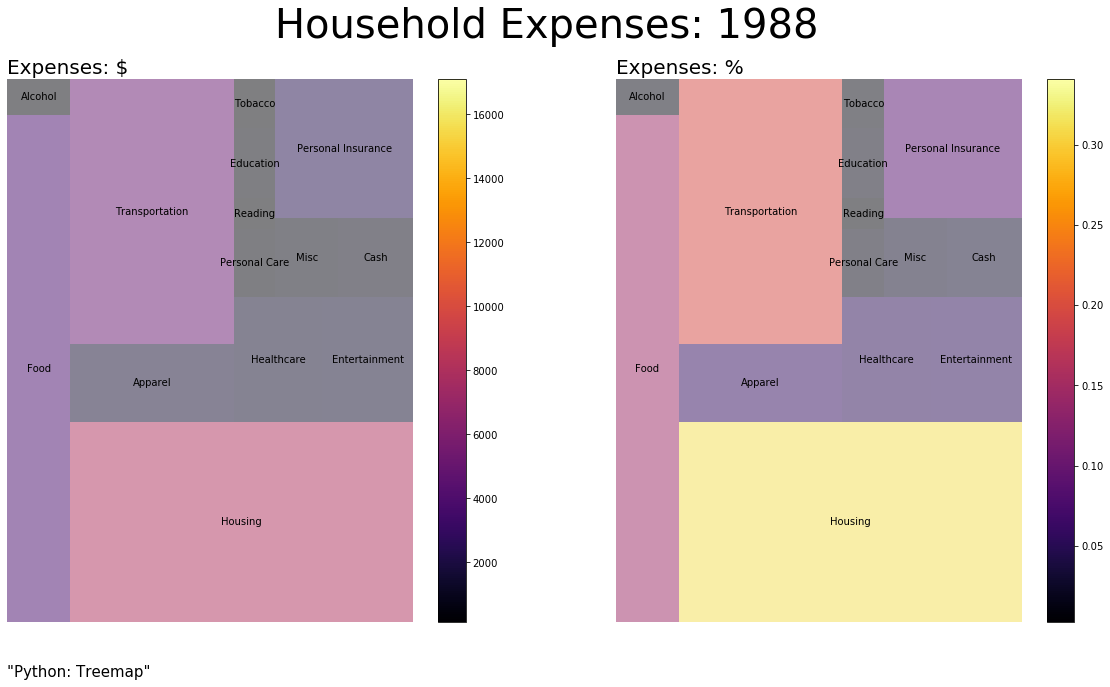

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_6.jpg


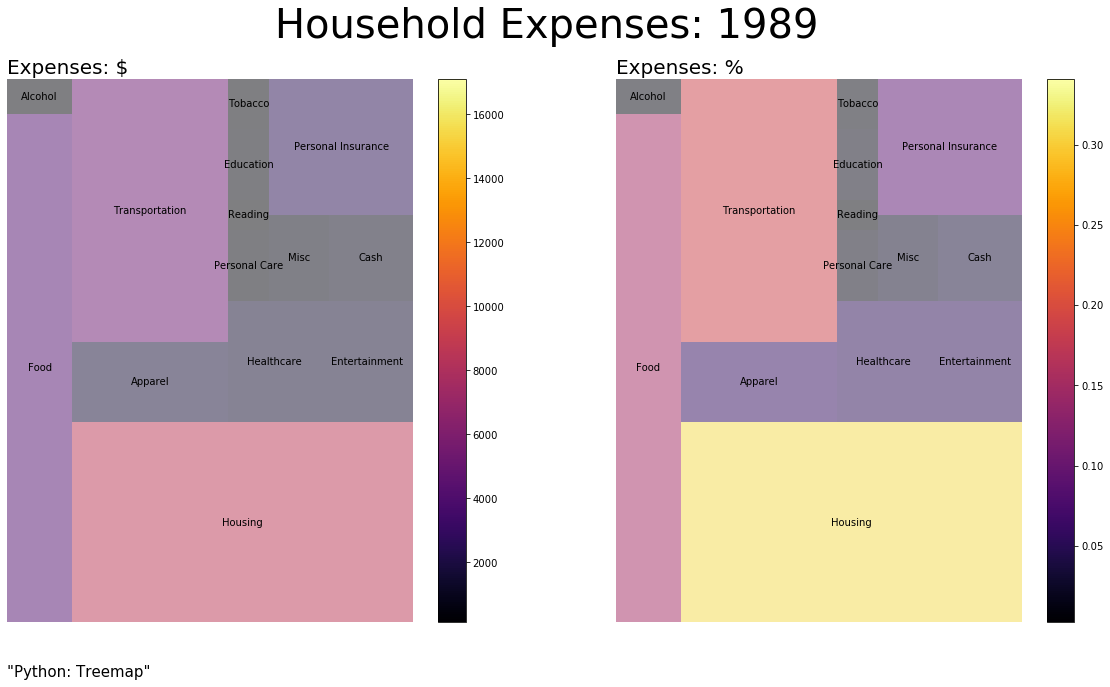

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_7.jpg


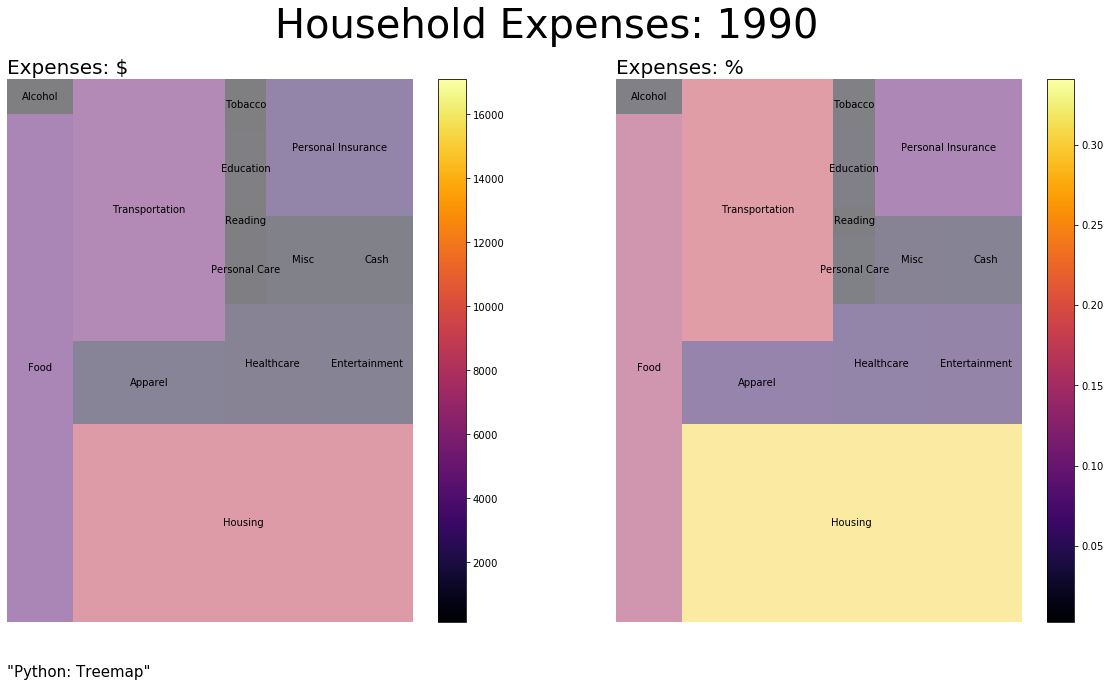

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_8.jpg


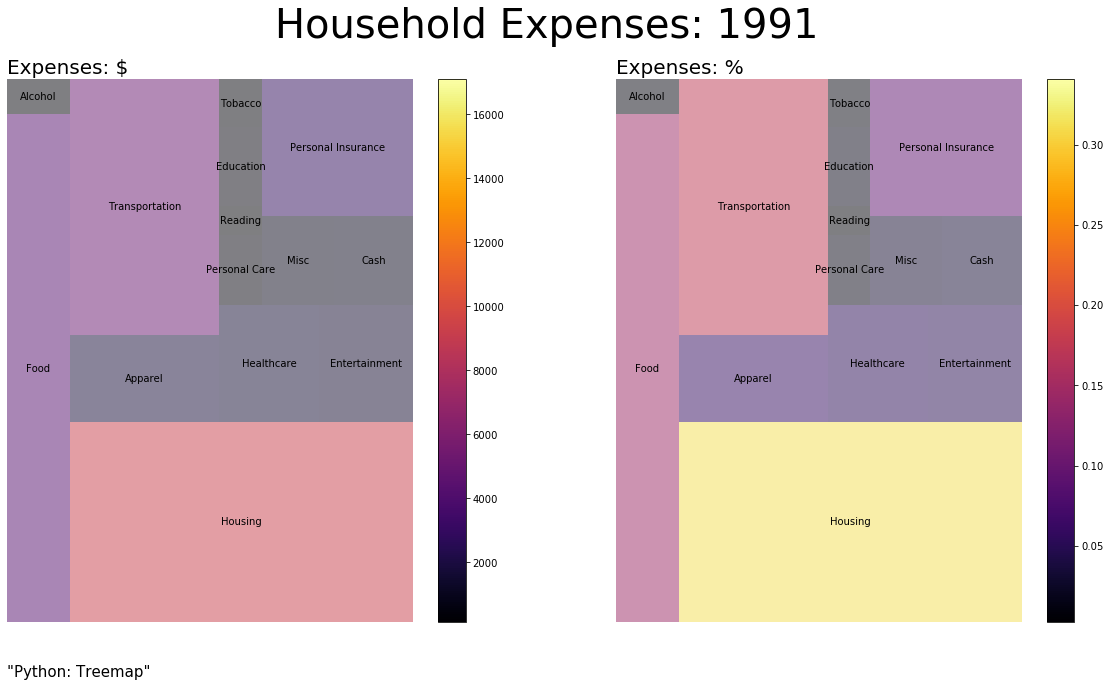

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_9.jpg


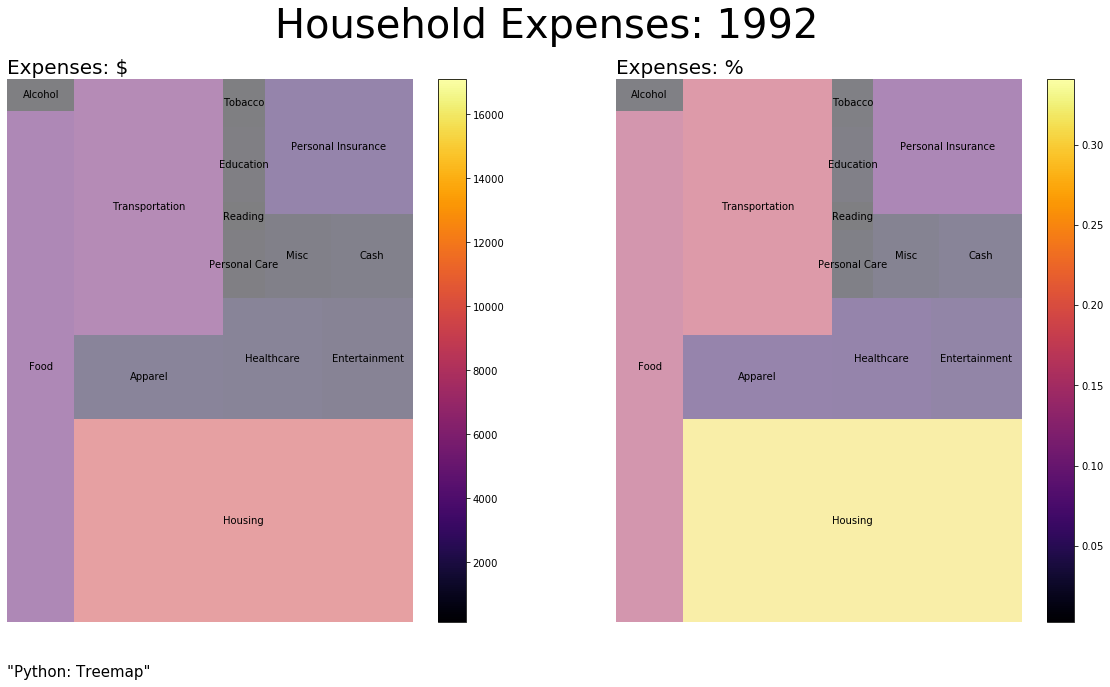

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_10.jpg


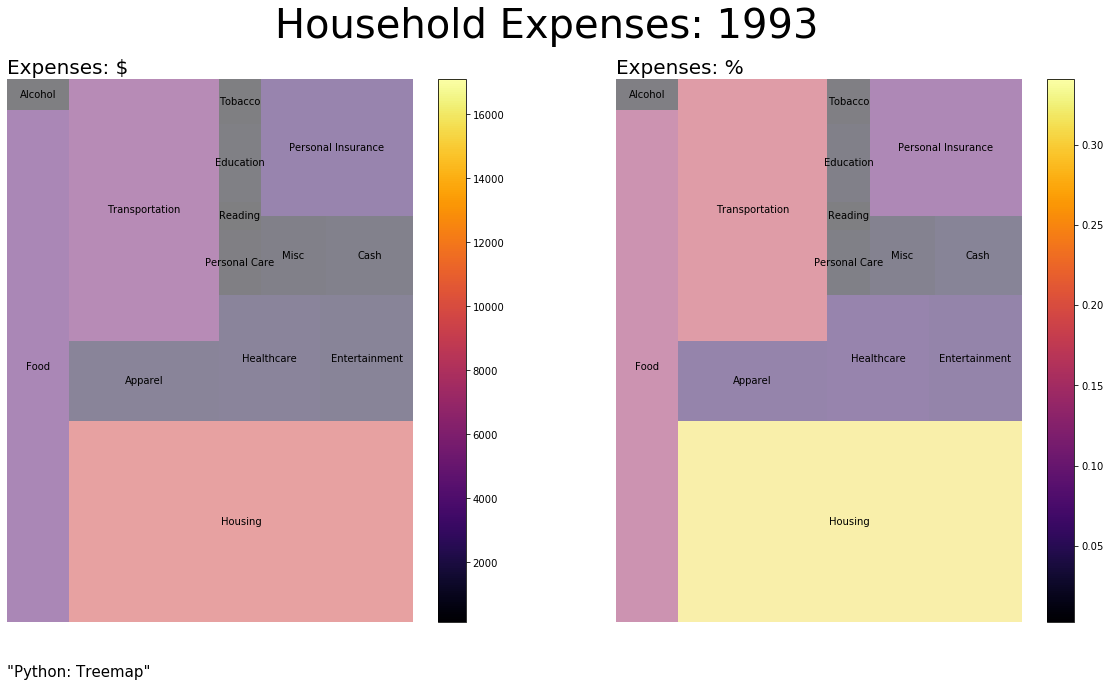

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_11.jpg


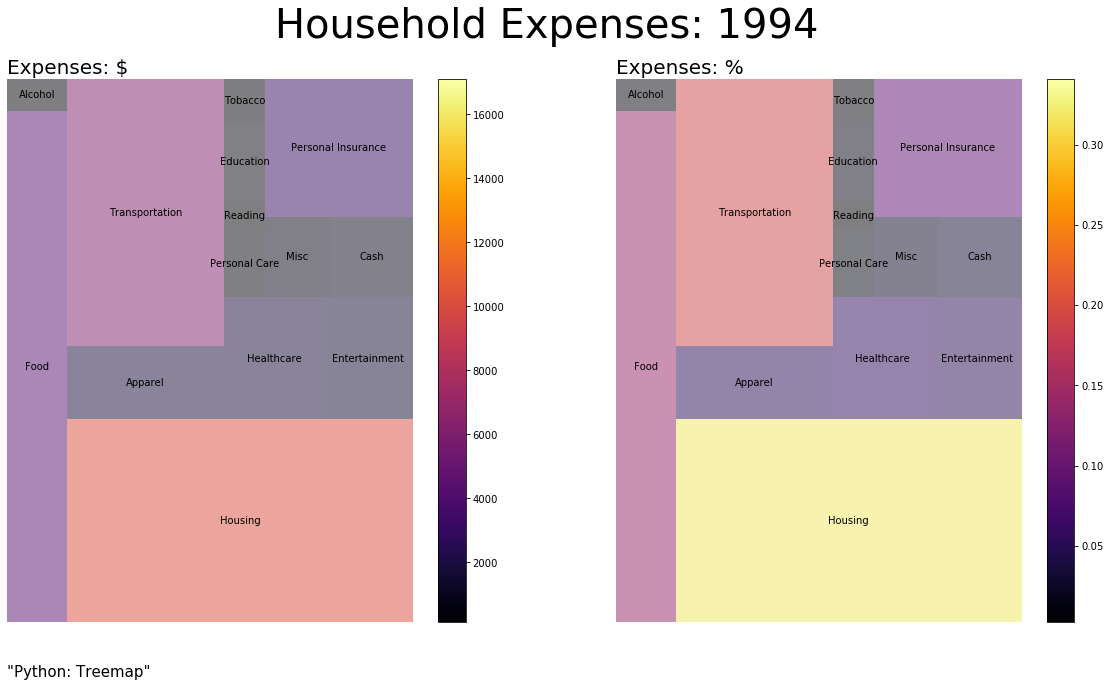

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_12.jpg


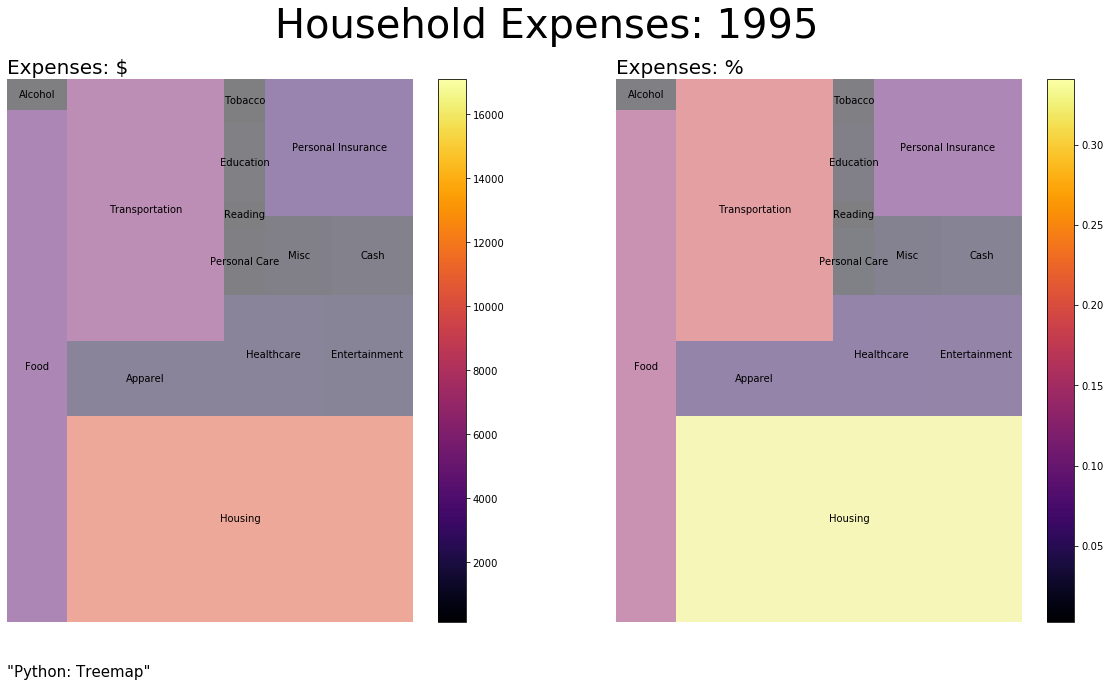

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_13.jpg


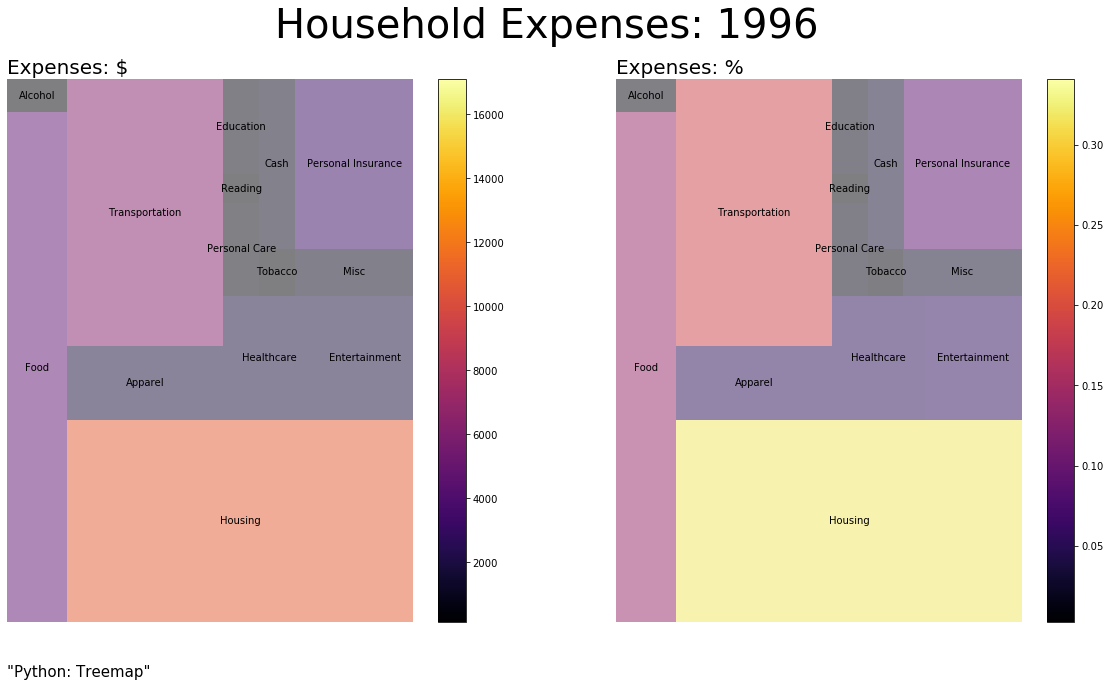

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_14.jpg


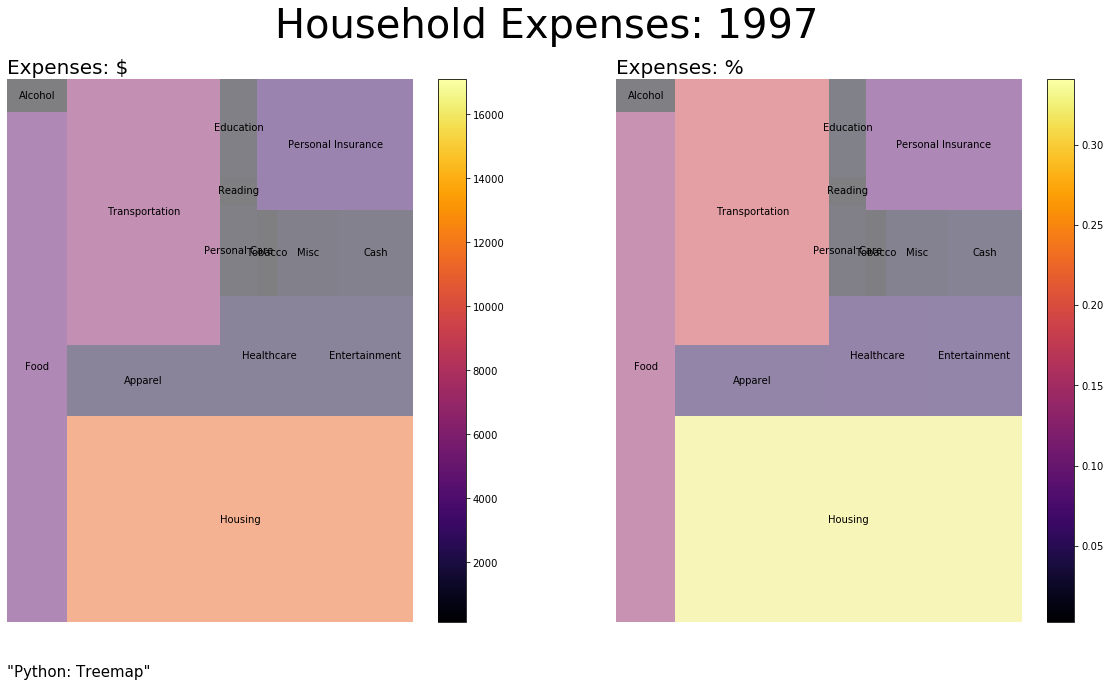

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_15.jpg


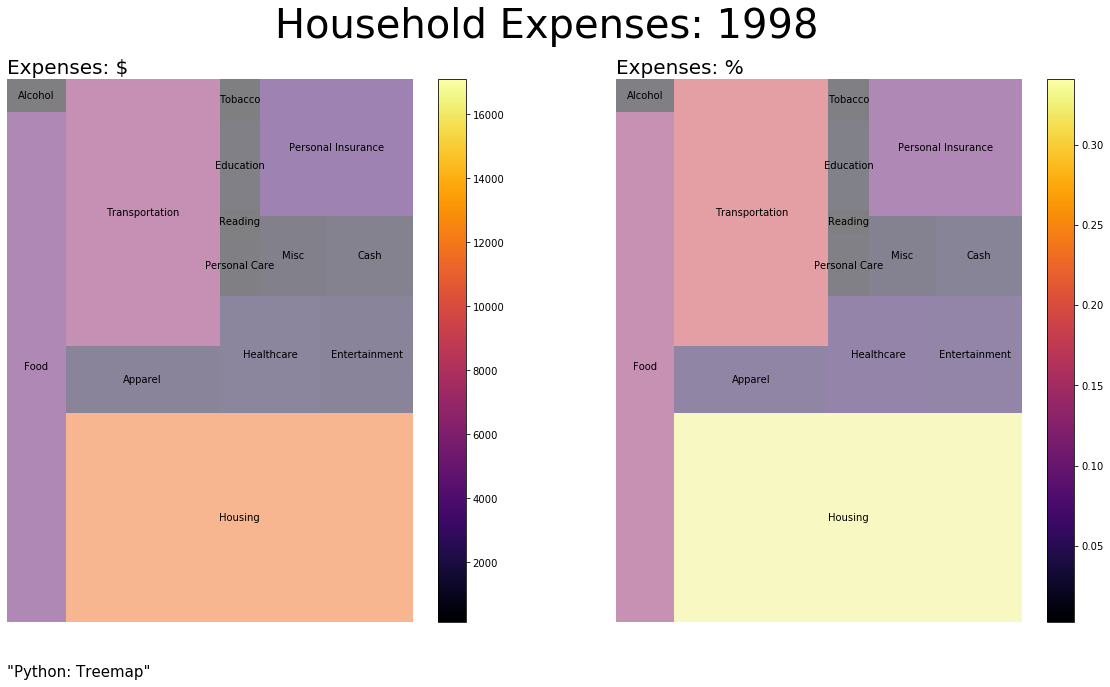

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_16.jpg


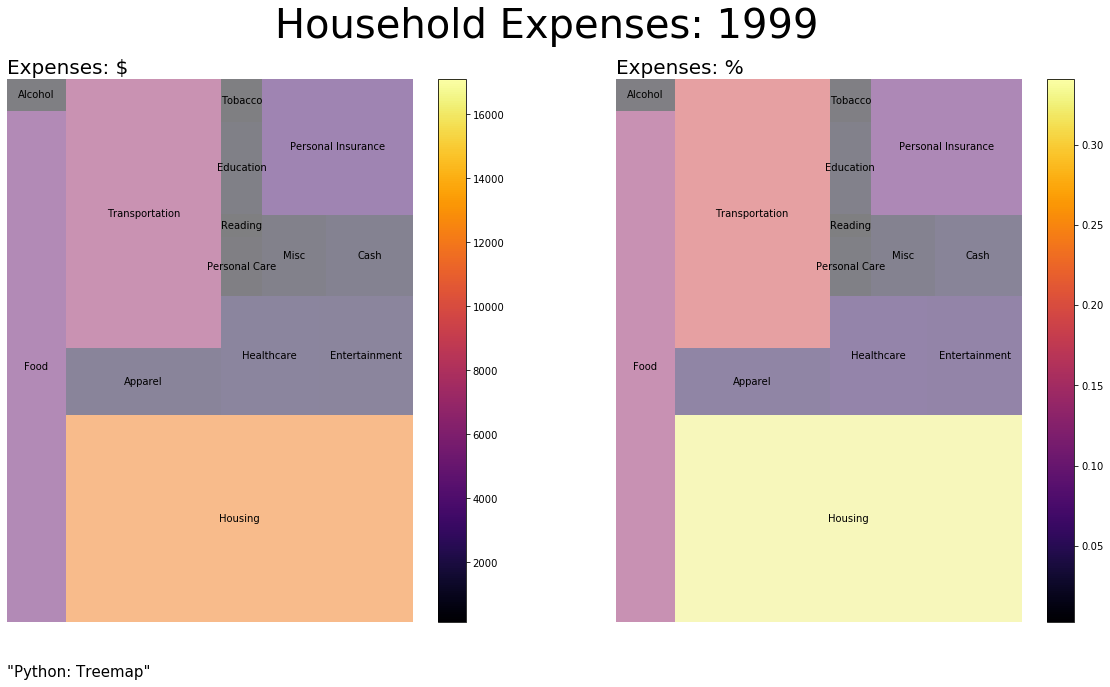

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_17.jpg


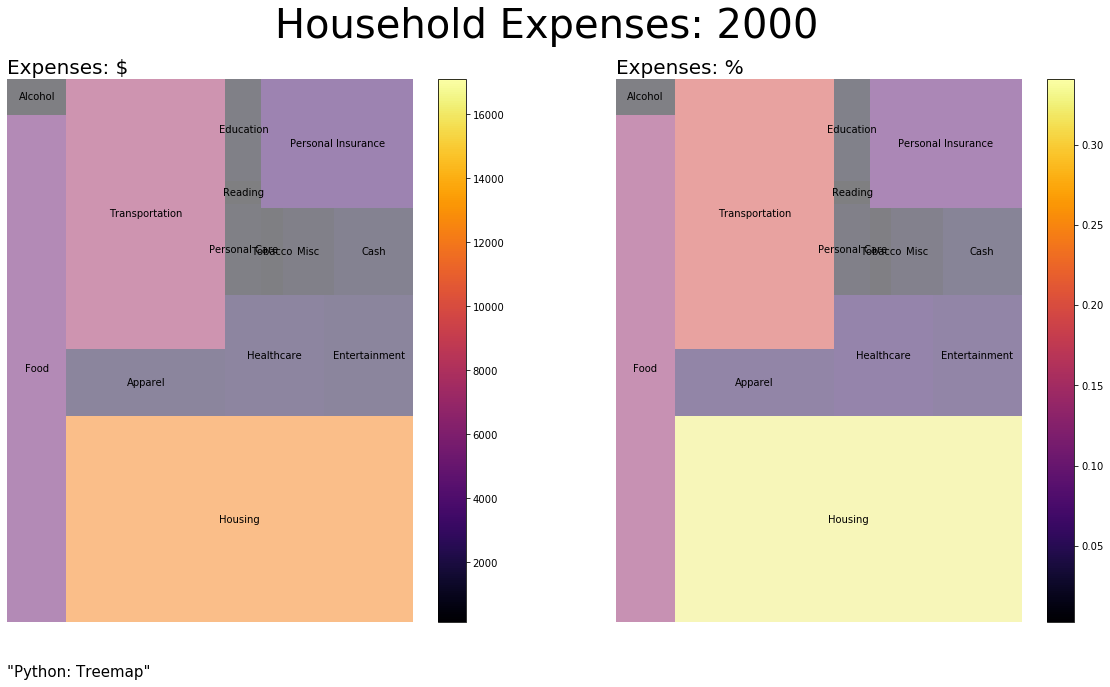

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_18.jpg


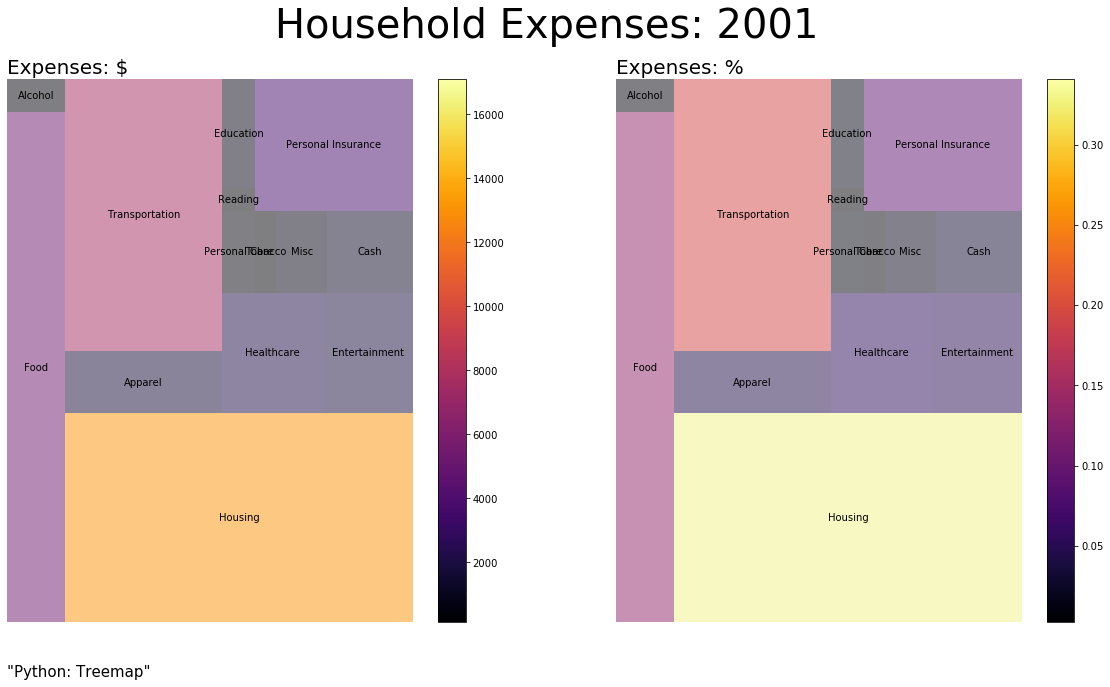

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_19.jpg


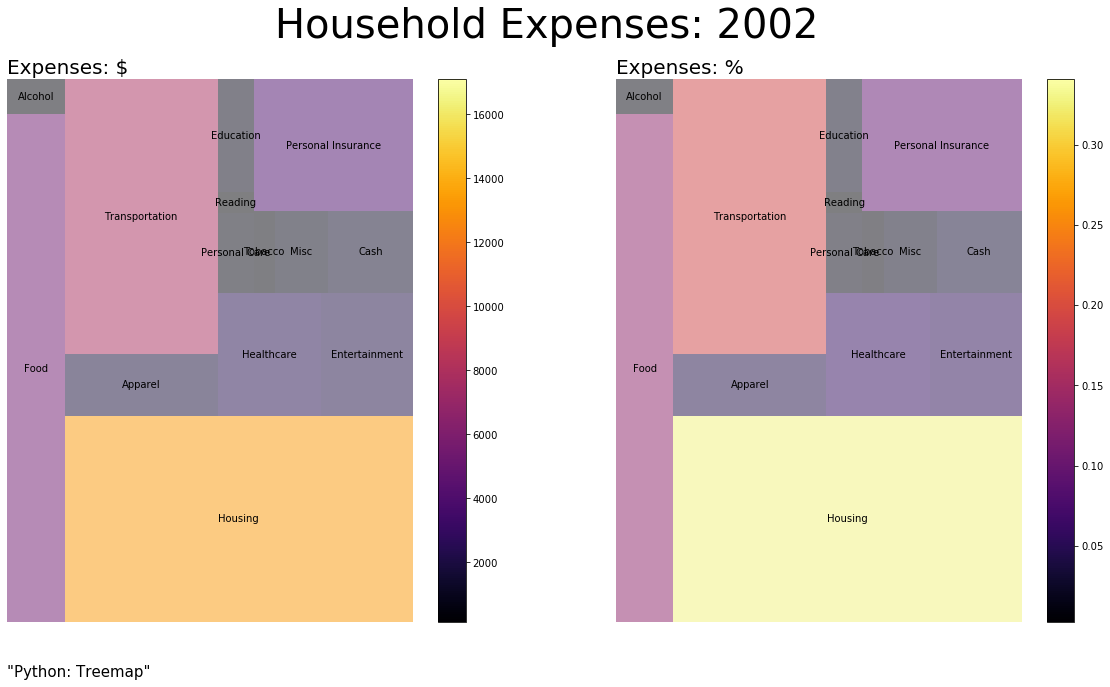

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_20.jpg


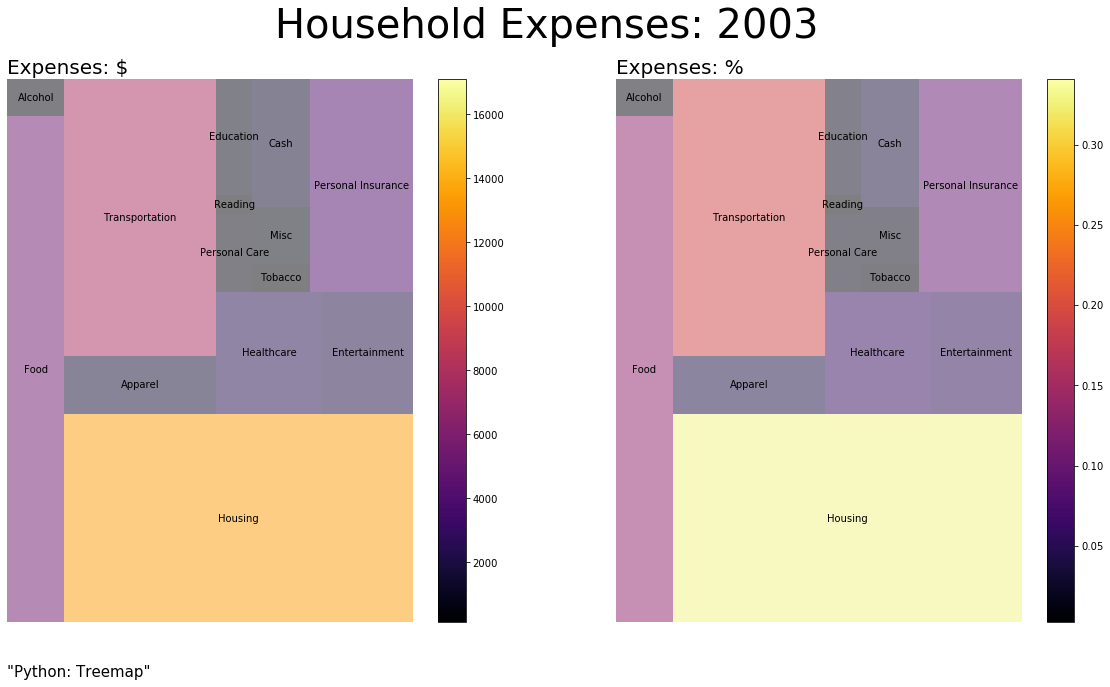

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_21.jpg


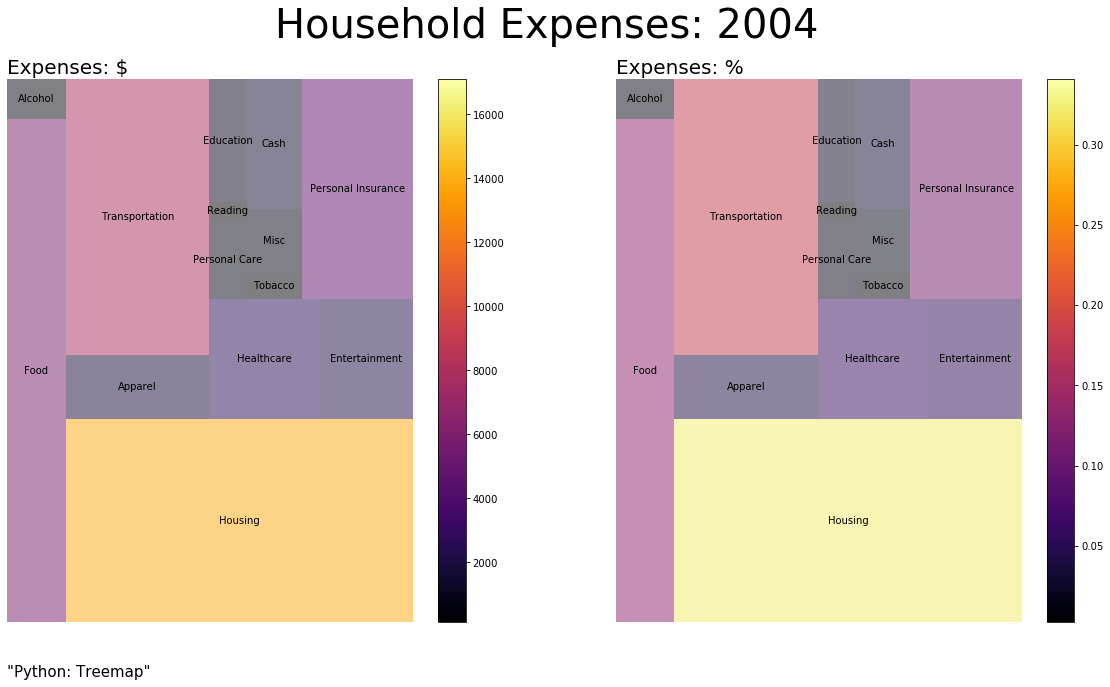

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_22.jpg


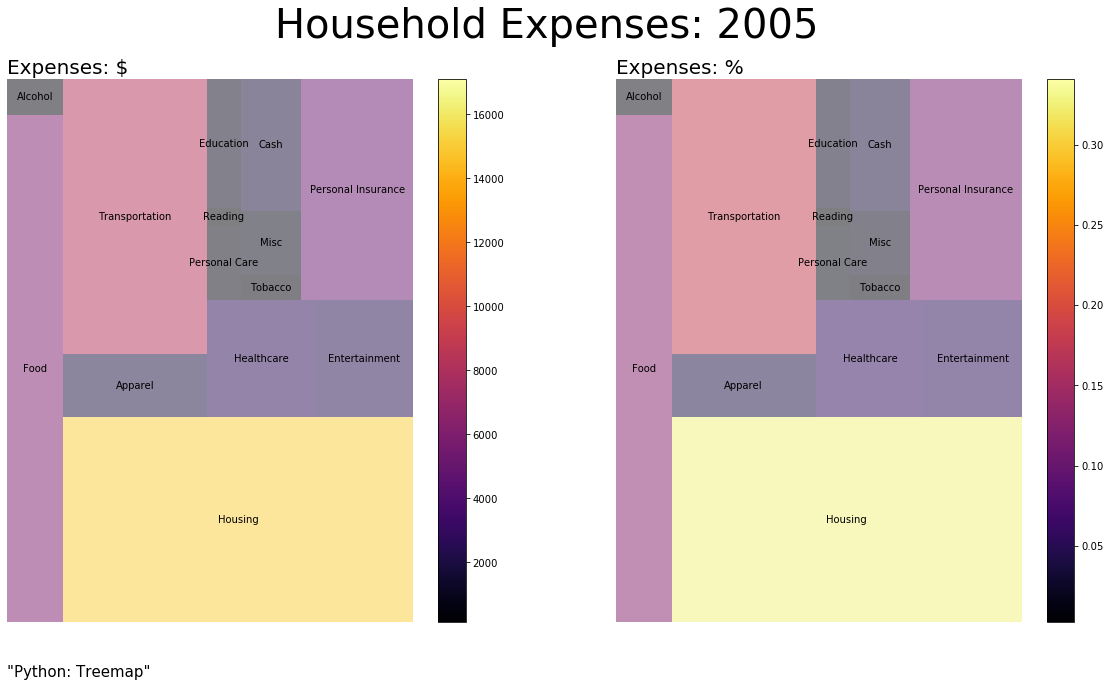

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_23.jpg


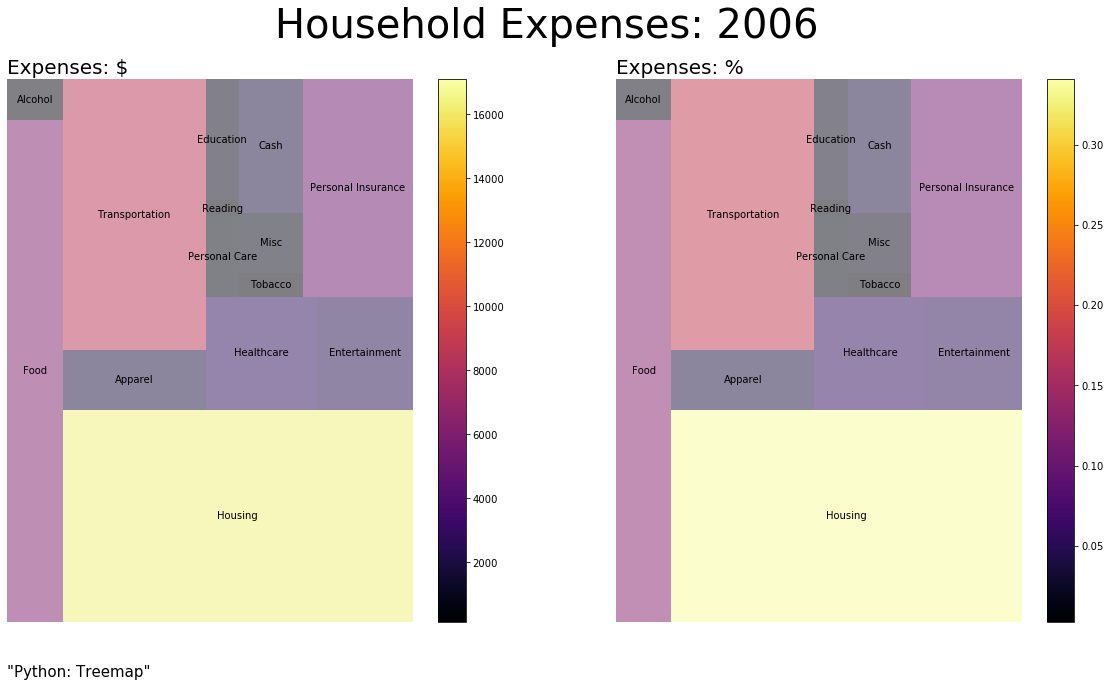

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_24.jpg


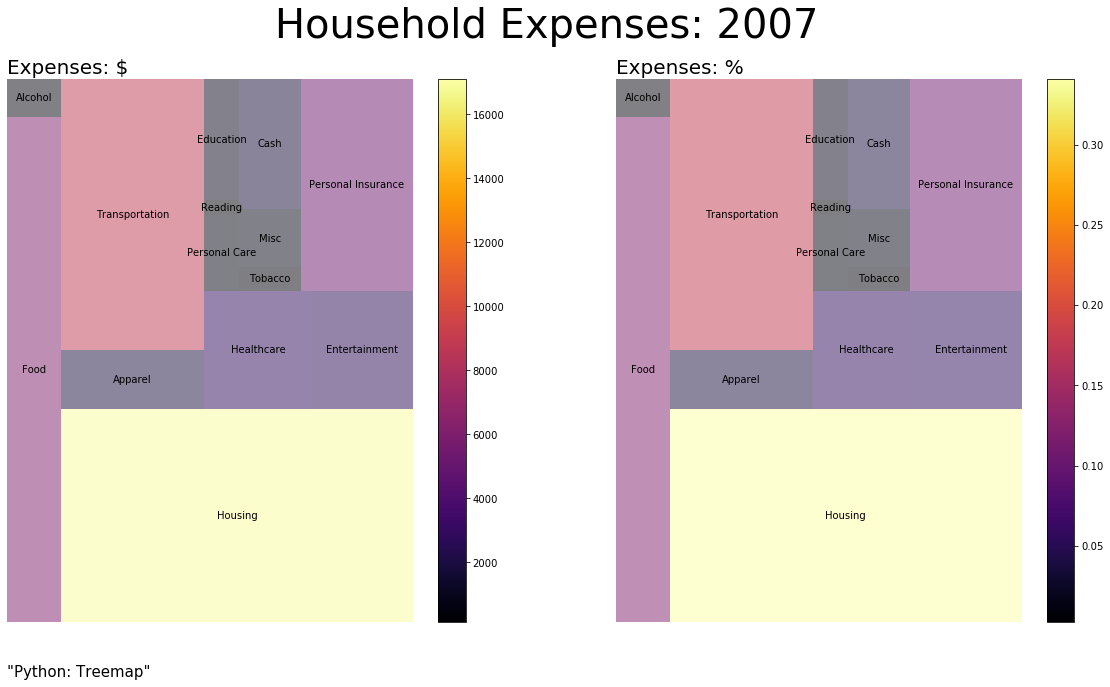

C:/Users/family/DSCProjects/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_25.jpg


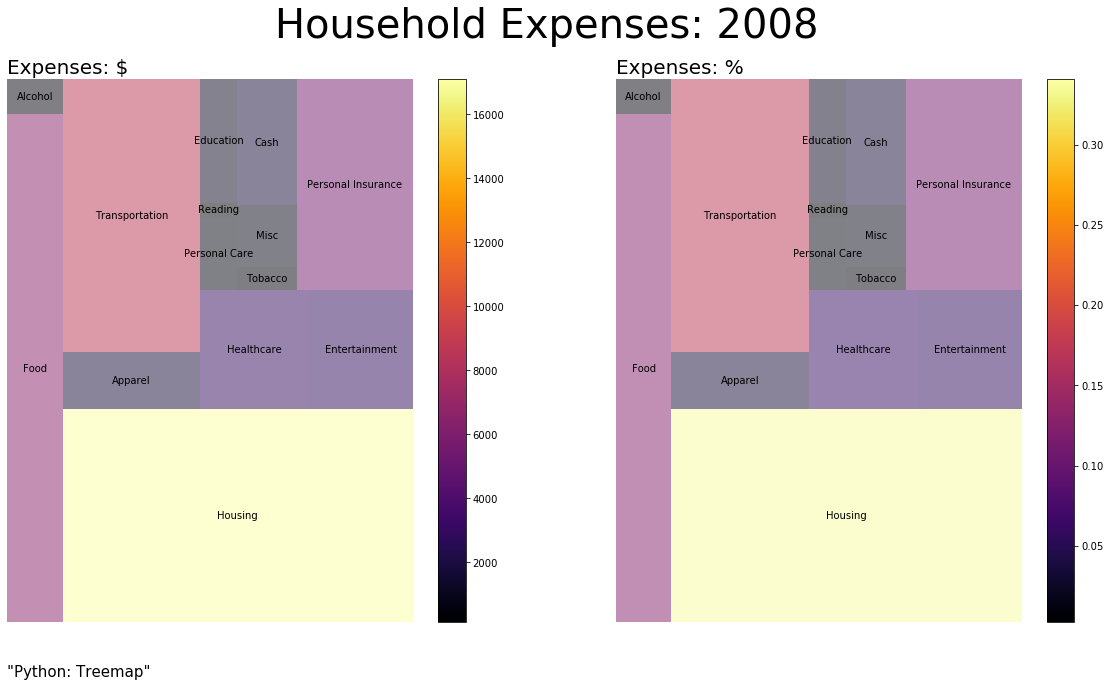

Building GIF...
Done...


In [17]:
#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col1' : 'expenditure',
    'x_col2' : 'percent',
    'label_col' : 'category',
    'fontsize_title' : 20,
    'fontsize' : 15,
    #'label_col' : 'expenditure',
}

#//*** Add A conditional so it doesn't render *every* time
if True:
    #//********************************************
    #//*** Build Output Filepath
    #//********************************************
    filepath = os.getcwd()
    filepath = filepath.replace("\\","/")
    filepath = f"{filepath}/anim_gif/wk05/"

    files_jpg = []
    gif_files = []
    
    filename_base = "wk05_expend_percent_"
    #//********************************************
    
    first=True
    file_counter = 0
    
    #//*** Set Colormap for Percent Color Bars
    plot_df = ex_df
    col = 'percent'
    vmin=min(plot_df[col])
    vmax=max(plot_df[col])
    norm_percent = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        
    
    #//*** Use Single Colorbar Scale expend plots.
    #//*** Set Colormap for Percent Color Bars
    plot_df = ex_df
    col = 'expenditure'
    vmin=min(plot_df[col])
    vmax=max(plot_df[col])
    norm_expend = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    
    
    
    for group in ex_df.groupby('year'):
        year = group[0]
        plot_df = group[1]
        
        file_counter += 1

        save_filename = f"{filepath}{filename_base}{file_counter}.jpg"
        
        #//*** Initialize the plots
        fig, ax = plt.subplots(ncols=2)
        fig = plt.gcf()
        fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])
        
        # Build Colorbars
        sm_expend = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm_expend)
        sm_percent = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm_percent)
    
        #//*** Add Colorbar
        fig.colorbar(sm_expend,ax=ax[0])
        fig.colorbar(sm_percent,ax=ax[1])
        
        #//*** Build Colors 
        colors_expend = [matplotlib.cm.inferno(norm_expend(value)) for value in   plot_df[pp['x_col1']]]
        colors_percent = [matplotlib.cm.inferno(norm_percent(value)) for value in plot_df[pp['x_col2']]]
        
        
        
        ax1 = squarify.plot(sizes=plot_df[pp['x_col1']], label=plot_df[pp['label_col']], alpha=.5,color=colors_expend,ax=ax[0])
        
        ax2 = squarify.plot(sizes=plot_df[pp['x_col2']], label=plot_df[pp['label_col']], alpha=.5,color=colors_percent,ax=ax[1])
        
        
        
        ax1.axis('off')
        ax2.axis('off')
        plt.text(pp['x_figsize']*-7.5,pp['y_figsize']*10.1,"Expenses: $ ",fontsize=pp['fontsize_title'])
        plt.text(pp['x_figsize']*0,pp['y_figsize']*10.1,"Expenses: % ",fontsize=pp['fontsize_title'])
        plt.suptitle(f"Household Expenses: {year}",fontsize=pp['fontsize_title']*2)
        plt.text(0,-.1,'"Python: Treemap"', size=pp['fontsize'], transform=ax[0].transAxes)
        print(save_filename)
        plt.savefig(save_filename,pil_kwargs={'quality': 95})

        plt.show()
        
        #//*** Read Files and Prepare Animated GID
        if first == True:
            first=False
            first_img = Image.open(save_filename).convert("P",palette=Image.ADAPTIVE)
        else:
            gif_files.append(Image.open(save_filename).convert("P",palette=Image.ADAPTIVE) )
        
        
    print("Building GIF...")
    #//*** Build and Save Animated GIF
    first_img.save("wk05_06_expenditure_1.gif", save_all=True, optimize=False, append_images=gif_files, duration=1000, loop=0)
    print("Done...")

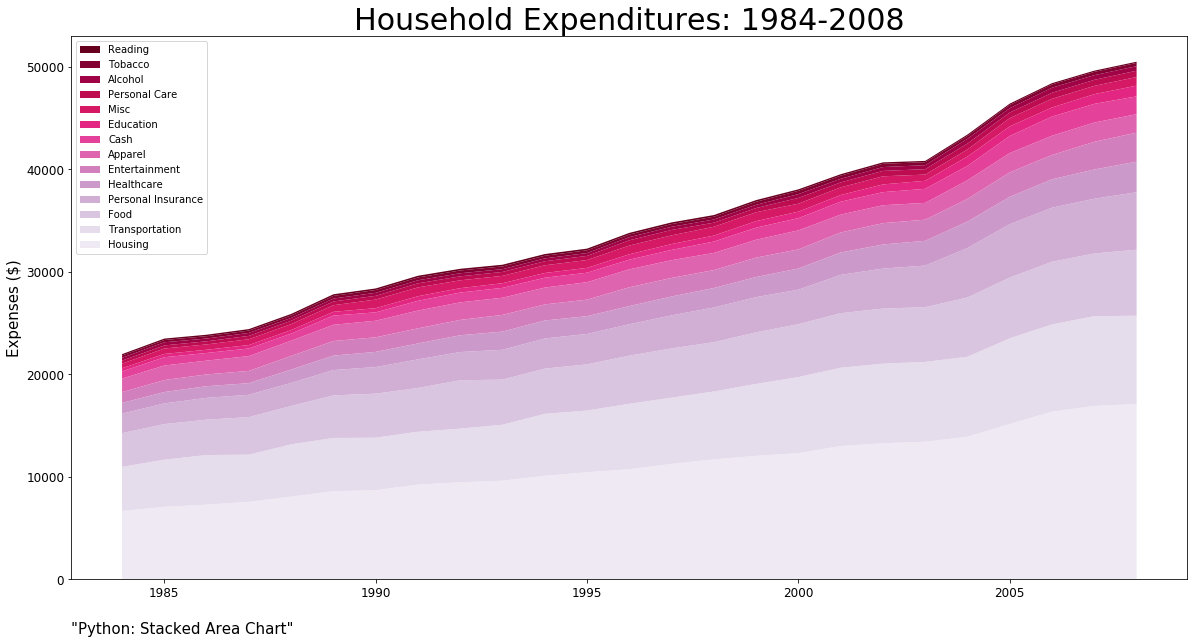

In [7]:
#//*** Build Sorted list of categories
cats = list(ex_df[ex_df['year'] == 2008].sort_values('expenditure',ascending=False)['category'].unique())
cats

plot_dict = {}

year = ex_df['year'].unique()

for cat in cats:
    
    plot_dict[cat] = ex_df[ex_df['category'] == cat]['expenditure'].values

#//*** Get a color Palette
item_count = len(cats)
counter_list = []
counter = 0
for x in range(item_count):
    counter += 100 / item_count
    counter_list.append(counter)
    
vmin=0
vmax=item_count
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
colors_palette = [matplotlib.cm.PuRd(norm(value)) for value in counter_list]

colors = {}
counter = 0
for period in plot_dict.keys():
    colors[period] = colors_palette[counter]
    counter+=1

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(20,10)


ax.stackplot(year, plot_dict.values(),
             labels=plot_dict.keys(),
             colors=colors_palette,
            )
plt.title("Household Expenditures: 1984-2008",fontsize=30)
#plt.legend()
plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
ax.set_ylabel("Expenses ($)",fontsize=15)
ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Stacked Area Chart"', size=pp['fontsize'], transform=ax.transAxes)

outfilename='output_wk05_06_python_area_stacked_expenditures.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)

plt.show()

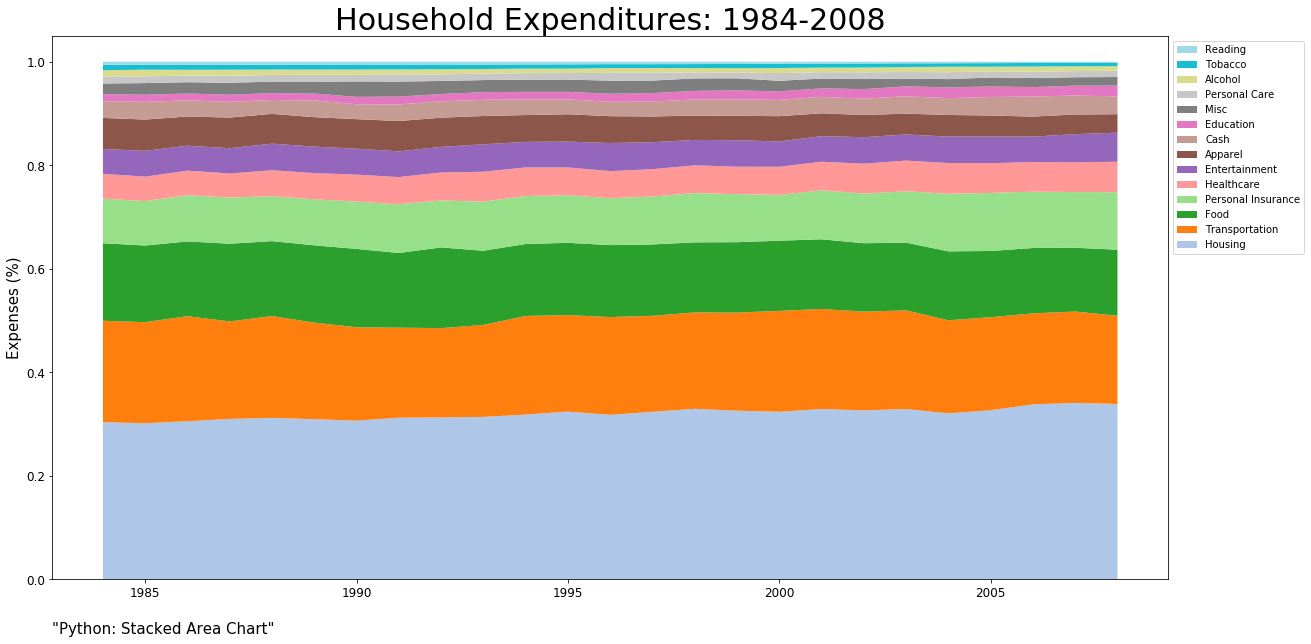

In [8]:
#//*** Build Sorted list of categories
cats = list(ex_df[ex_df['year'] == 2008].sort_values('percent',ascending=False)['category'].unique())
cats

plot_dict = {}

year = ex_df['year'].unique()

for cat in cats:
    
    plot_dict[cat] = ex_df[ex_df['category'] == cat]['percent'].values

#//*** Get a color Palette
item_count = len(cats)
counter_list = []
counter = 0
for x in range(item_count):
    counter += 100 / item_count
    counter_list.append(counter)
    
vmin=0
vmax=item_count
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
colors_palette = [matplotlib.cm.tab20(norm(value)) for value in counter_list]

colors = {}
counter = 0
for period in plot_dict.keys():
    colors[period] = colors_palette[counter]
    counter+=1

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(20,10)


ax.stackplot(year, plot_dict.values(),
             labels=plot_dict.keys(),
             colors=colors_palette,
            )
plt.title("Household Expenditures: 1984-2008",fontsize=30)
#plt.legend()
plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),bbox_to_anchor=(1,1),loc='upper left')
ax.set_ylabel("Expenses (%)",fontsize=15)
ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Stacked Area Chart"', size=pp['fontsize'], transform=ax.transAxes)

outfilename='output_wk05_06_python_area_stacked_expenditures_percent.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)

plt.show()

In [9]:
emp_df = pd.read_csv("z_wk05_06_unemployement-rate-1948-2010.csv")

emp_df = emp_df[emp_df['Year'] != 2010]

emp_df



,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
739,LNS14000000,2009,M08,9.7
740,LNS14000000,2009,M09,9.8
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0


In [10]:
emp_df = pd.read_csv("z_wk05_06_unemployement-rate-1948-2010.csv")

emp_df = emp_df[emp_df['Year'] != 2010]
tdf = pd.DataFrame()

for group in emp_df.groupby('Period'):
    group[1]['diff'] = group[1]['Value'].diff()
    tdf = pd.concat([tdf,group[1]])
    
emp_df = tdf.dropna()
del tdf
emp_df[emp_df['Period'] == "M01"]
emp_df[emp_df['Year'] == 1960]

offset=pd.Series(dtype='float64')
tdf = pd.DataFrame()
for month in list(emp_df['Period'].unique())[::-1]:
    loop_df = emp_df[emp_df['Period']==month].copy()
    
    if len(offset) == 0:
        offset = np.array(loop_df['Value']) 
    else:
        offset = offset + np.array(loop_df['Value']) 
        
    loop_df['cum'] = offset
    
    tdf = pd.concat([tdf,loop_df])
    
emp_df = tdf
del tdf
#emp_df['Period'].unique()

#//*** Rename Periods to Month names
months = { 
    "M01" : "January", 
    "M02" : "February", 
    "M03" : "March", 
    "M04" : "April", 
    "M05" : "May", 
    "M06" : "June", 
    "M07" : "July", 
    "M08" : "August", 
    "M09" : "September", 
    "M10" : "October",
    "M11" : "November", 
    "M12" : "December",
}


for find,replace in months.items():
    emp_df['Period'] = emp_df['Period'].str.replace(find,replace)
emp_df = emp_df.sort_index()
emp_df
emp_df['Period'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

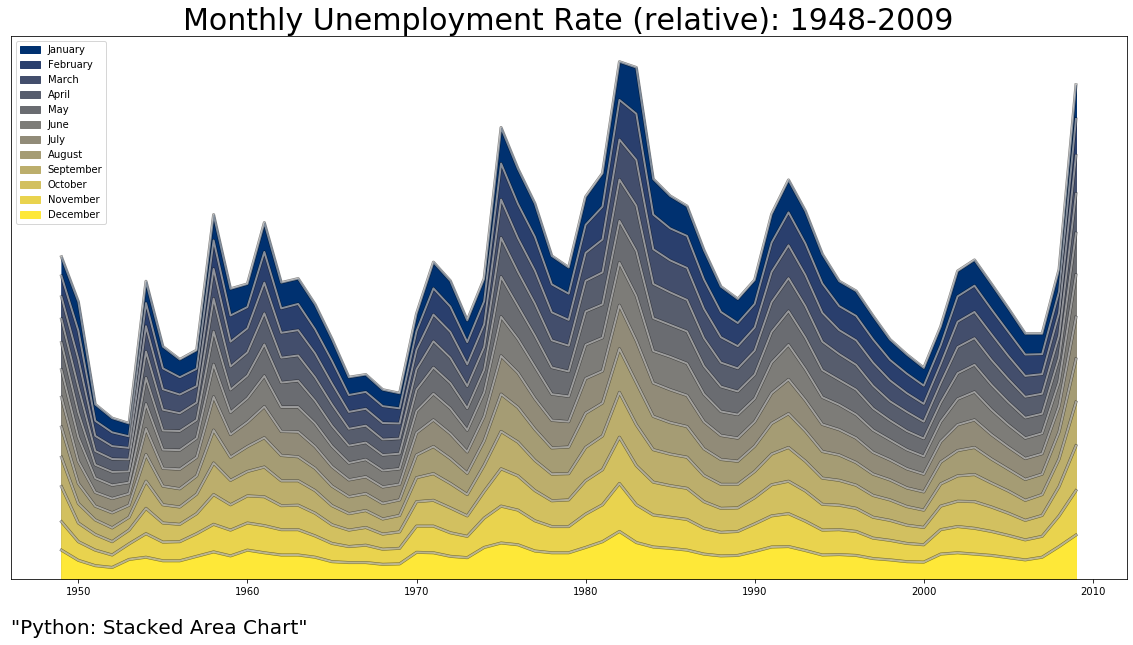

In [11]:

#https://www.python-graph-gallery.com/250-basic-stacked-area-chart

#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col' : 'Year',
    'y_col' : 'cum',
    'x_ticks' : 'Year',
    'label_col' : 'category',
    'fontsize_title' : 30,
    'fontsize' : 20,
    #'label_col' : 'expenditure',
}

#//*** Get a color Palette
item_count = len(emp_df['Period'].unique())
counter_list = []
counter = 0
for x in range(item_count):
    counter += 100 / item_count
    counter_list.append(counter)
    
vmin=0
vmax=item_count
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
colors_palette = [matplotlib.cm.cividis(norm(value)) for value in counter_list]

colors = {}
counter = 0
for period in emp_df['Period'].unique():
    colors[period] = colors_palette[counter]
    counter+=1

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])

for month in months.values():
    
    plot_df = emp_df[emp_df['Period'] == month]
    plt.stackplot(plot_df[pp['x_col']],plot_df[pp['y_col']],labels=[month], alpha=1, color=colors[month] )
    plt.plot (plot_df[pp['x_col']],plot_df[pp['y_col']],linewidth=3, alpha=.5, color='black' )
    plt.plot (plot_df[pp['x_col']],plot_df[pp['y_col']],linewidth=2, alpha=.5, color='white' )
plt.title("Monthly Unemployment Rate (relative): 1948-2009",fontsize=pp['fontsize_title'])
plt.text(0,-.1,'"Python: Stacked Area Chart"', size=pp['fontsize'], transform=ax.transAxes)
ax.get_yaxis().set_visible(False)        
plt.legend()

outfilename='output_wk05_06_python_area_stacked_unemployment.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)

plt.show()

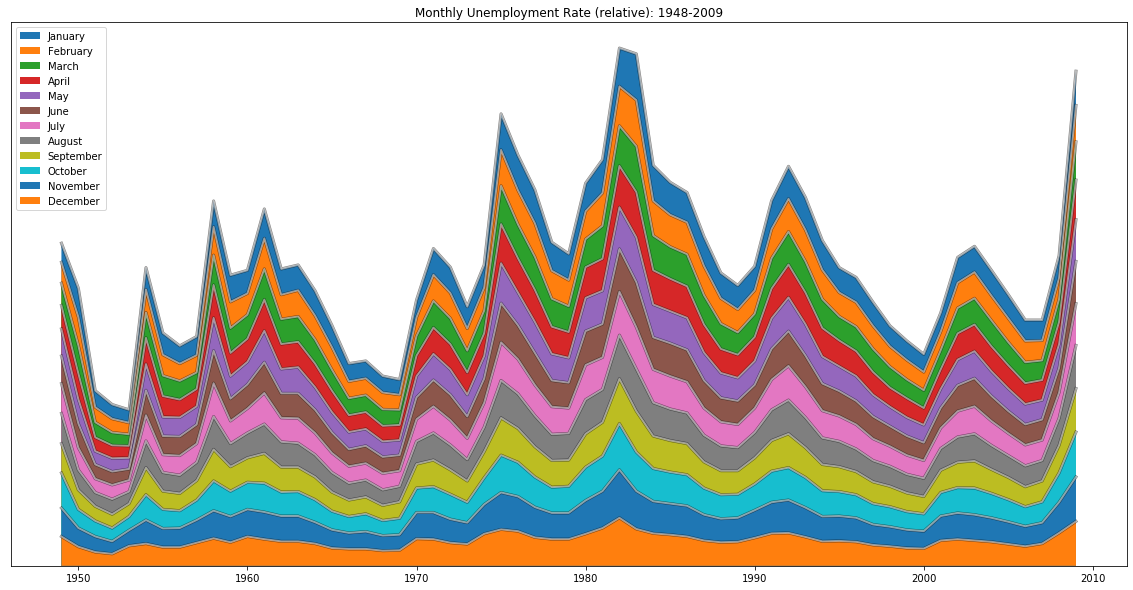

In [12]:

#https://www.python-graph-gallery.com/250-basic-stacked-area-chart

#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col' : 'Year',
    'y_col' : 'cum',
    'x_ticks' : 'Year',
    'label_col' : 'category',
    
    'fontsize_title' : 15,
    #'label_col' : 'expenditure',
}

#//*** Get a color Palette
item_count = len(emp_df['Period'].unique())
counter_list = []
counter = 0
for x in range(item_count):
    counter += 100 / item_count
    counter_list.append(counter)
    
vmin=0
vmax=item_count
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
colors_palette = [matplotlib.cm.cividis(norm(value)) for value in counter_list]

colors = {}
counter = 0
for period in emp_df['Period'].unique():
    colors[period] = colors_palette[counter]
    counter+=1

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])

for month in months.values():
    
    plot_df = emp_df[emp_df['Period'] == month]
    plt.stackplot(plot_df[pp['x_col']],plot_df[pp['y_col']],labels=[month], alpha=1 )
    plt.plot (plot_df[pp['x_col']],plot_df[pp['y_col']],linewidth=3, alpha=.5, color='black' )
    plt.plot (plot_df[pp['x_col']],plot_df[pp['y_col']],linewidth=2, alpha=.5, color='white' )
plt.title("Monthly Unemployment Rate (relative): 1948-2009")

ax.get_yaxis().set_visible(False)        
plt.legend()
plt.show()

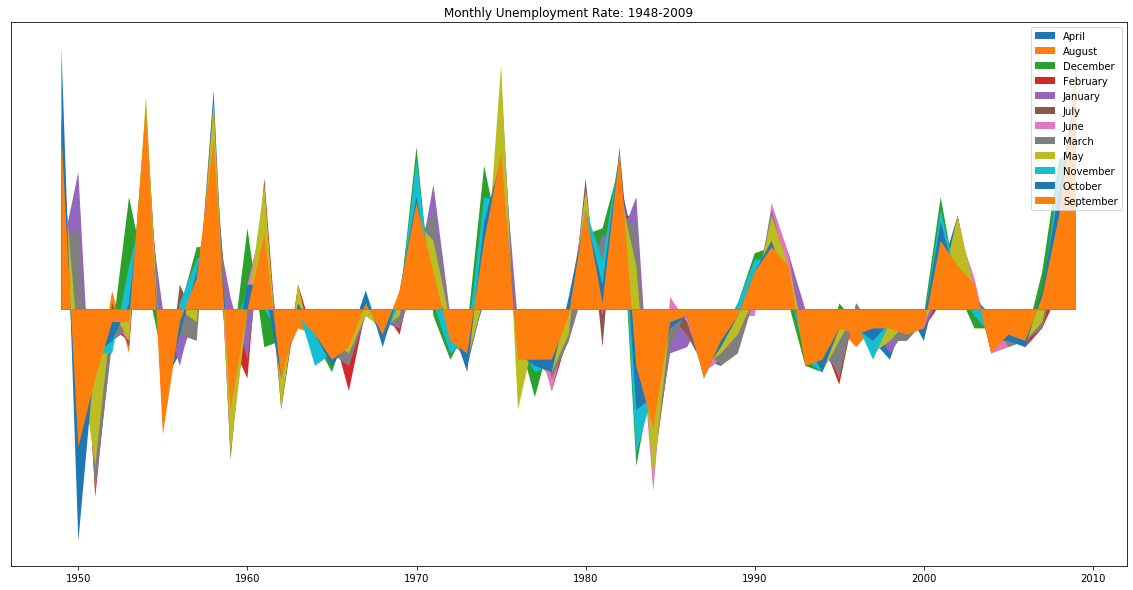

In [13]:
#https://www.python-graph-gallery.com/250-basic-stacked-area-chart

#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col' : 'Year',
    'y_col' : 'diff',
    'x_ticks' : 'Year',
    'label_col' : 'category',
    'fontsize_title' : 15,
    #'label_col' : 'expenditure',
}



fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])
offset=pd.Series(dtype='float64')
for group in emp_df.groupby('Period'):
    plot_df = group[1]
    plt.stackplot(plot_df[pp['x_col']],plot_df[pp['y_col']],labels=[group[0]] )
plt.title("Monthly Unemployment Rate: 1948-2009")
#ax.axis('off')
ax.get_yaxis().set_visible(False)        
plt.legend()
plt.show()

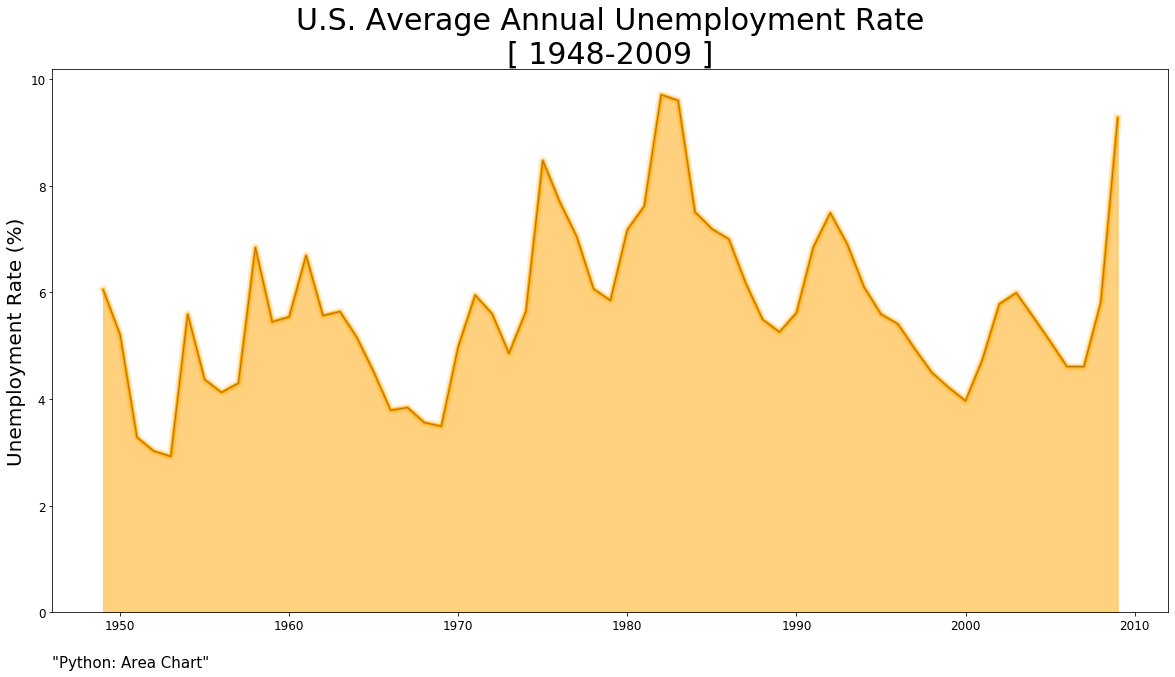

In [14]:
years = []
year_mean = []

for group in emp_df.sort_values('Year').groupby('Year'):
    years.append(group[0])
    year_mean.append(group[1]['Value'].mean())


pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'fontsize_title' : 15,
    'fontsize' : 15,
    #'label_col' : 'expenditure',
}

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])

plt.stackplot(years,year_mean,color='orange',alpha=.5 )
plt.plot(years,year_mean,color='orange', alpha=.2, linewidth=8 )
plt.plot(years,year_mean,color='orange', alpha=.4, linewidth=4 )
plt.plot(years,year_mean,color='orange', alpha=.6, linewidth=3 )
plt.plot(years,year_mean,color='orange', alpha=1, linewidth=2 )
plt.plot(years,year_mean,color='black', alpha=.3, linewidth=1 )
plt.title("U.S. Average Annual Unemployment Rate\n[ 1948-2009 ]",fontsize=30)
ax.set_ylabel("Unemployment Rate (%)",fontsize=20)
ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Area Chart"', size=pp['fontsize'], transform=ax.transAxes)


outfilename='output_wk05_06_python_area_us_unemployment.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)


plt.show()
    


In [15]:
#//*** Print filenames for HTML Conversion pipeline dictionary
for file in out_file_for_print:
    
    print(f"'{file.split('.')[0]}' : '{file}',")

'output_wk05_06_python_treemap_housing' : 'output_wk05_06_python_treemap_housing.png',
'output_wk05_06_python_area_stacked_expenditures' : 'output_wk05_06_python_area_stacked_expenditures.png',
'output_wk05_06_python_area_stacked_expenditures_percent' : 'output_wk05_06_python_area_stacked_expenditures_percent.png',
'output_wk05_06_python_area_stacked_unemployment' : 'output_wk05_06_python_area_stacked_unemployment.png',
'output_wk05_06_python_area_us_unemployment' : 'output_wk05_06_python_area_us_unemployment.png',


In [16]:
# //*** CODE HERE